# 【補足】機械学習を用いた異常検知 - その他の手法

## DBSCAN (Density-based spatial clustering of applications with noise)   

データクラスタリングアルゴリズムです。クラスタ -1 は外れ値を示します。
DBSCAN には 2 つのパラメータが必要です。

1. epsilon: 近傍探索の半径を定義する距離パラメータ。
2. min_samples: クラスタを形成するために必要な最小限の点数。

すべてのデータは、コア点、境界点、ノイズ点（外れ値）に分類されます。

- コア点：自身の半径内に min_samples 数を持つ点
- 境界点：コア点の半径内にあるが、自身の半径内の他の点が min_samples 数よりも少ない点
- ノイズ点：コア点でも境界点でもない点

![04](img/04/04.png)

## 実装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# データの準備
np.random.seed(0)
x1 = np.random.normal(0, 1, 1000)
x2 = x1 + np.random.normal(0, 0.3, 1000)
x = np.stack([x1, x2], axis=1)
anomaly = np.array([[-4, -5], [-1.5, 2], [2.5, -2.5]])
data = np.concatenate([x, anomaly], axis=0)

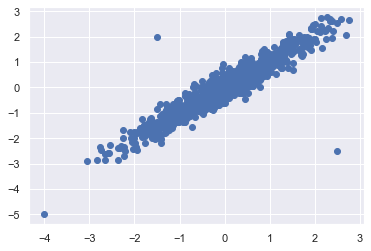

In [3]:
plt.scatter(data[:, 0], data[:, 1])

In [4]:
from sklearn.cluster import DBSCAN
# 関数
def dbscan_outliers(x, eps=0.5, min_samples=5):
    outlier_detection = DBSCAN(eps=eps, min_samples=min_samples) # default eps=0.5, min_samples=5
    outlier_detection.fit(x)
    labels = outlier_detection.labels_
    return labels

In [5]:
labels = dbscan_outliers(data)

In [6]:
labels

array([ 0,  0,  0, ..., -1, -1, -1])

In [7]:
np.unique(labels, return_counts=True)

(array([-1,  0]), array([   3, 1000]))

In [8]:
data = pd.DataFrame(data, columns=['x1', 'x2'])
data['cluster'] = labels
data

x1        x2  cluster
0     1.764052  1.930841        0
1     0.400157  0.667899        0
2     0.978738  0.852044        0
3     2.240893  2.272307        0
4     1.867558  1.935974        0
...        ...       ...      ...
998  -1.147611 -1.490181        0
999  -0.358114 -0.751405        0
1000 -4.000000 -5.000000       -1
1001 -1.500000  2.000000       -1
1002  2.500000 -2.500000       -1

[1003 rows x 3 columns]

<AxesSubplot:xlabel='x1', ylabel='x2'>

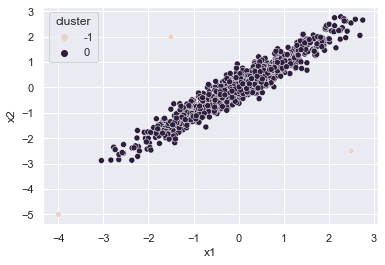

In [9]:
sns.scatterplot(x=data['x1'], y=data['x2'], hue=data['cluster'])